In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
keras.__version__

'2.4.3'

In [2]:
from keras.datasets import mnist
from keras.utils import to_categorical

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!unzip "/content/drive/MyDrive/Colab Notebooks/test.zip" -d "/content"
!unzip "/content/drive/MyDrive/Colab Notebooks/train.zip" -d "/content"

Archive:  /content/drive/MyDrive/Colab Notebooks/test.zip
   creating: /content/test/
  inflating: /content/__MACOSX/._test  
  inflating: /content/test/.DS_Store  
  inflating: /content/__MACOSX/test/._.DS_Store  
   creating: /content/test/G/
  inflating: /content/__MACOSX/test/._G  
   creating: /content/test/A/
  inflating: /content/__MACOSX/test/._A  
   creating: /content/test/D/
  inflating: /content/__MACOSX/test/._D  
   creating: /content/test/E/
  inflating: /content/__MACOSX/test/._E  
   creating: /content/test/B/
  inflating: /content/__MACOSX/test/._B  
  inflating: /content/test/G/img_5x29.jpg  
  inflating: /content/__MACOSX/test/G/._img_5x29.jpg  
  inflating: /content/test/G/img_5x15.jpg  
  inflating: /content/__MACOSX/test/G/._img_5x15.jpg  
  inflating: /content/test/G/img_4x6.jpg  
  inflating: /content/__MACOSX/test/G/._img_4x6.jpg  
  inflating: /content/test/G/img_4x41.jpg  
  inflating: /content/__MACOSX/test/G/._img_4x41.jpg  
  inflating: /content/test/G/im

In [5]:
image_size = (32,32)
batch_size = 32
train_flow_path = '/content/train' 
test_flow_path = '/content/test'

In [6]:
data_gen_train = keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
)

data_gen_test = keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
)

train_images = data_gen_train.flow_from_directory(
    train_flow_path,
    target_size = image_size,
    batch_size = batch_size,
    color_mode = 'rgb',
    classes = ['A', 'B', 'D', 'E', 'G'],
    class_mode = 'categorical',
    shuffle = True,
    seed = 42
)

test_images = data_gen_test.flow_from_directory(
    test_flow_path,
    target_size = image_size,
    batch_size = batch_size,
    color_mode = 'rgb',
    classes = ['A','B', 'D', 'E', 'G'],
    class_mode = 'categorical',
    shuffle = True,
    seed = 42
)

Found 1000 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [7]:
from keras.models import Sequential
from keras.layers import Flatten,InputLayer,Dense, Dropout, Convolution2D, MaxPool2D, Dropout, BatchNormalization

In [8]:
def add_conv_layer(model,size,name='Layer Conv'):
    model.add(
        Convolution2D(
            size,
            (3,3),
            activation='relu',
            padding='same',
        )
    )
    model.add(
        Convolution2D(
            size,
            (3,3),
            activation='relu',
            padding='same'
        )
    )
    model.add(
        Convolution2D(
            size,
            (3,3),
            activation='relu',
            padding='same',
        )
    )
    model.add(
        Convolution2D(
            size,
            (3,3),
            activation='relu',
            padding='same',
        )
    )
    
    model.add(MaxPool2D())
    return model

In [9]:
model = Sequential(name='ConvolutionNetworkChars')
model.add(Convolution2D(16,(3,3),activation='relu',padding="same",input_shape=[32,32,3]))
model.add(Convolution2D(16,(3,3),activation='relu',padding="same"))
model.add(MaxPool2D())
add_conv_layer(model,32)
add_conv_layer(model,64)
add_conv_layer(model,128)
add_conv_layer(model,256)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))

model.add(Dense(5,activation='softmax'))

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "ConvolutionNetworkChars"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 16)        2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16,

In [10]:
history = model.fit(train_images, epochs=50, validation_data = test_images)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/50
32/32 [==============================] - 16s 454ms/step - loss: 1.5560 - accuracy: 0.2831 - val_loss: 4.7761 - val_accuracy: 0.2000
Epoch 2/50
32/32 [==============================] - 14s 449ms/step - loss: 1.1194 - accuracy: 0.4105 - val_loss: 1.6373 - val_accuracy: 0.2040
Epoch 3/50
32/32 [==============================] - 14s 439ms/step - loss: 1.0330 - accuracy: 0.4617 - val_loss: 72.2320 - val_accuracy: 0.2000
Epoch 4/50
32/32 [==============================] - 14s 436ms/step - loss: 0.9882 - accuracy: 0.5002 - val_loss: 70.9019 - val_accuracy: 0.2000
Epoch 5/50
32/32 [==============================] - 14s 441ms/step - loss: 0.8836 - accuracy: 0.5733 - val_loss: 74.4570 - val_accuracy: 0.2000
Epoch 6/50
32/32 [==============================] - 14s 442ms/step - loss: 0.8533 - accuracy: 0.6022 - val_loss: 40.9961 - val_accuracy: 0.2000
Epoch 7/50
32/32 [==============================] - 14s 439ms/step - loss: 0.8249 - accuracy: 0.6190 - val_loss: 20.6248 - val_accuracy: 0

In [11]:
scores = model.evaluate(test_images)
print(f'* Loss = {scores[0]}\n* Accuracy = {scores[1]}')

 1/16 [>.............................] - ETA: 1s - loss: 2.2209 - accuracy: 0.6875

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


16/16 [==============================] - 1s 70ms/step - loss: 3.9081 - accuracy: 0.4440
* Loss = 3.9080755710601807
* Accuracy = 0.4440000057220459


In [12]:
from keras.utils.vis_utils import plot_model

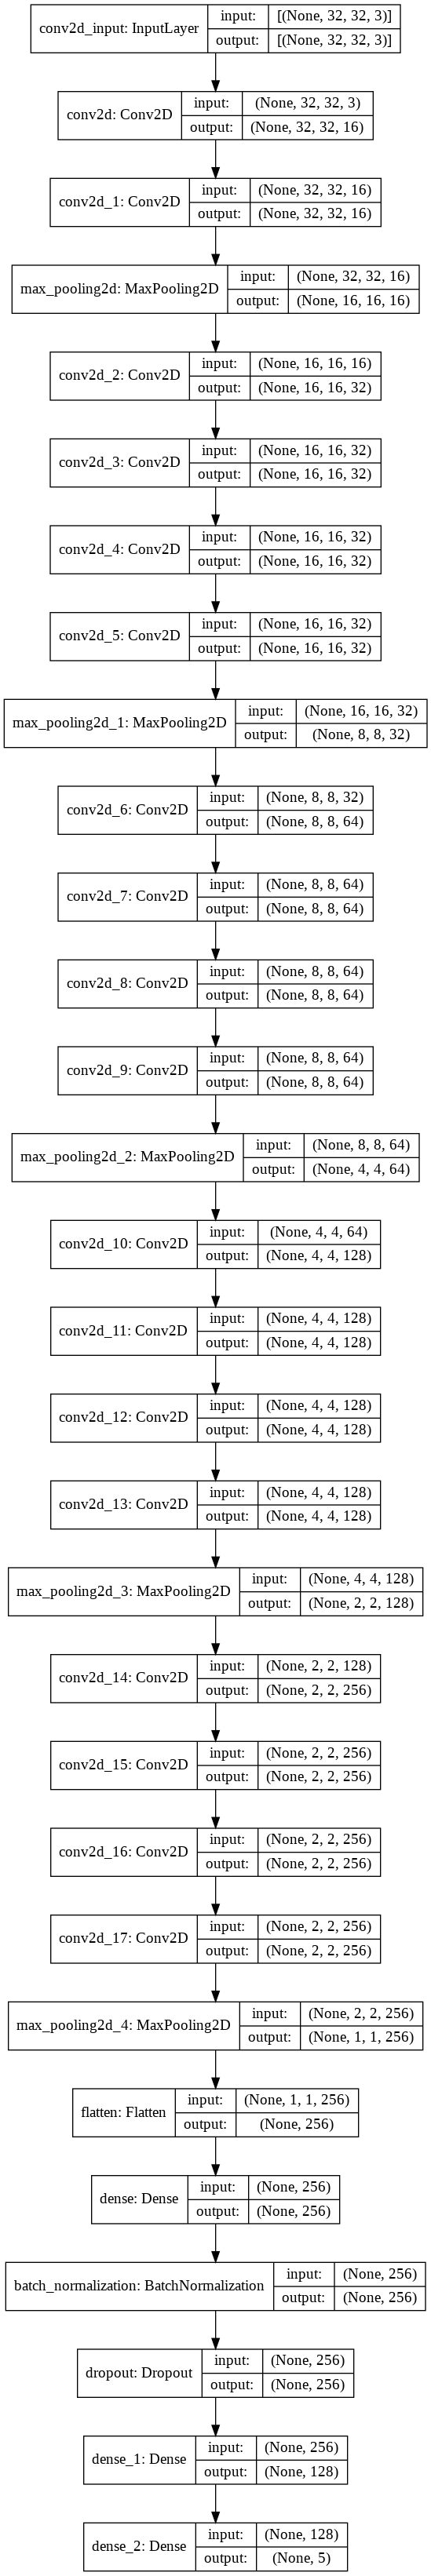

In [13]:
plot_model(model, to_file='./Conv_model.png', show_shapes=True, show_layer_names=True)

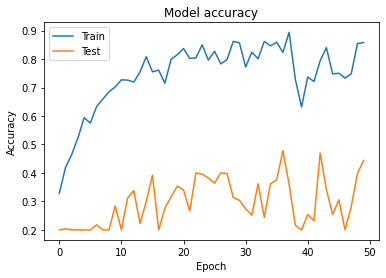

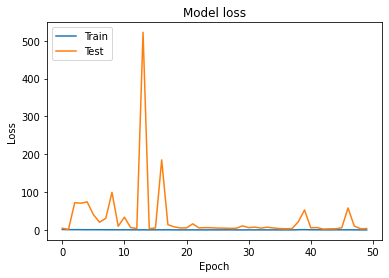

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('./Conv_accuracy.png')
plt.show()
#
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('./Conv_loss.png')
plt.show()